In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
import nolearn.lasagne.visualize 

In [3]:
NETS = []
NETS.append('../nets/IP_FULL.p') # image + prob
NETS.append('../nets/IPLB_FULL.p') # image + large border
NETS.append('../nets/IPM_FULL.p') # image + prob + binary
NETS.append('../nets/IPMB_FULL.p') # image + prob + binary + border
NETS.append('../nets/IPMLB_FULL.p') # image + prob + binary + large border

network_path = NETS[-1]

with open(network_path, 'rb') as f:
    net = pickle.load(f)

In [4]:
X_test, y_test = gp.Patch.load_rgba_test_only('ipmlb')

Loaded /home/d/patches//ipmlb/ in 0.0680668354034 seconds.


In [14]:
len(X_test)

17560

In [5]:
test_prediction = net.predict(X_test)
test_prediction_prob = net.predict_proba(X_test)
print
print 'Precision/Recall:'
print classification_report(y_test, test_prediction)


Precision/Recall:
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      8780
          1       0.92      0.96      0.94      8780

avg / total       0.94      0.94      0.94     17560



In [6]:
test_acc = net.score(X_test, y_test)
acc_score = accuracy_score(y_test, test_prediction)
print 'Test Accuracy:', test_acc
print 'Accuracy Score:', acc_score

Test Accuracy: 0.940432801822
Accuracy Score: 0.940432801822


<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

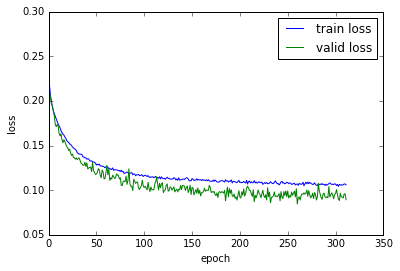

In [7]:
plot_loss(net)

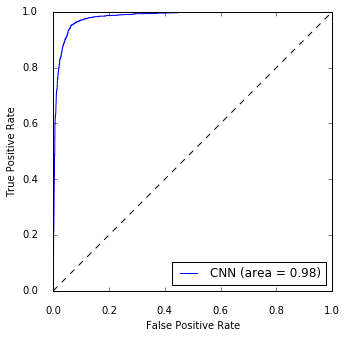

In [8]:
# ROC/AUC
fpr, tpr, _ = roc_curve(y_test, test_prediction_prob[:,1])
roc_auc = auc(fpr, tpr)
data = {}
data['CNN'] = (fpr, tpr, roc_auc)
gp.Legacy.plot_roc(data)

In [5]:
net.uuid = 'IPMLB'

a
Finding Top 5 merge errors..
19  merge errors found.
Creating dojo bigM..

Correcting merge errors with p < .05
   Mean VI improvement 0.000689478277265
   Median VI improvement 0.0
Correcting split errors with p > .95
   Mean VI improvement 0.0418435697434
   Median VI improvement 0.0376444300922

Correcting merge errors by simulated user (er=0)


/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


   Mean VI improvement 0.00498339154038
   Median VI improvement 0.00813268853006
Correcting split errors by simulated user (er=0)
   Mean VI improvement 0.123369068111
   Median VI improvement 0.136681301308


NameError: global name 'dojo_vi_99' is not defined

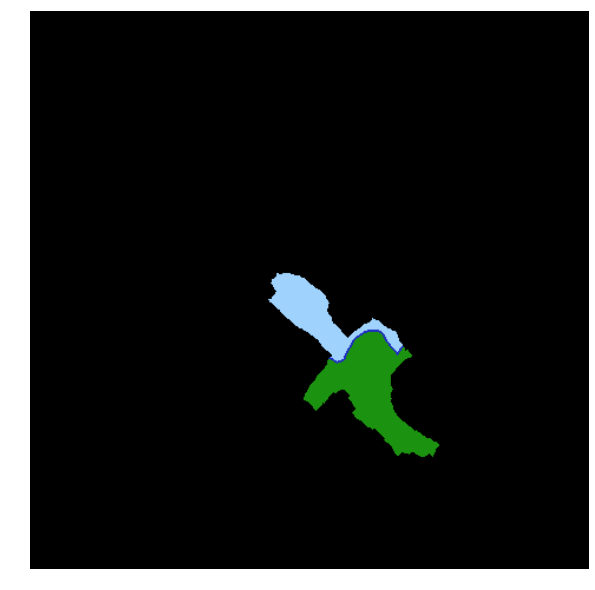

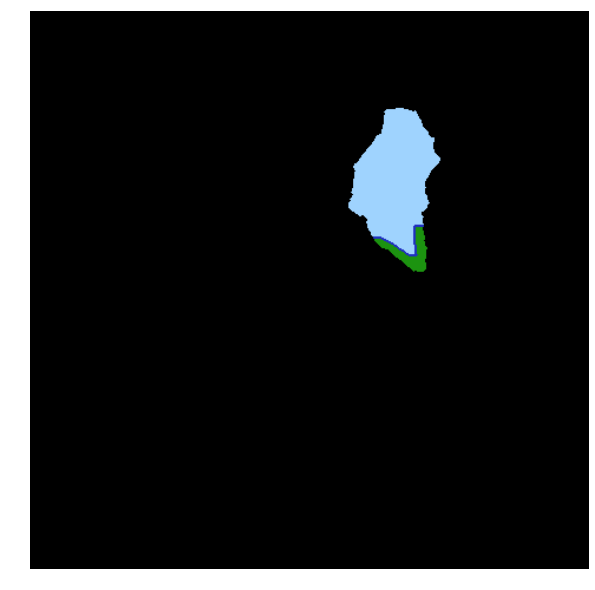

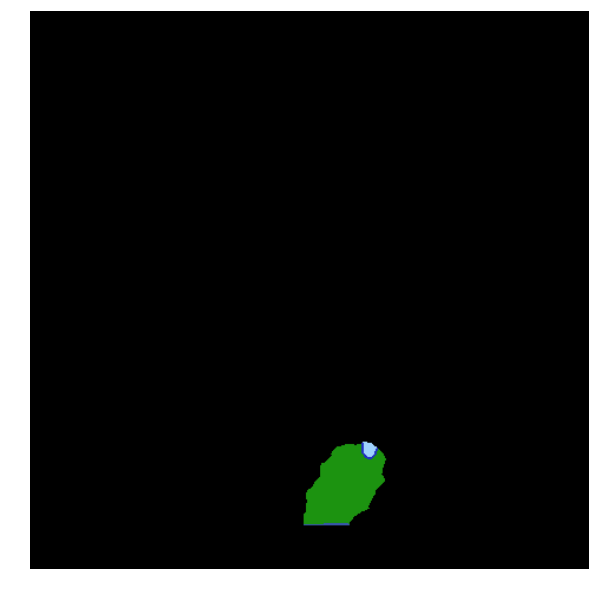

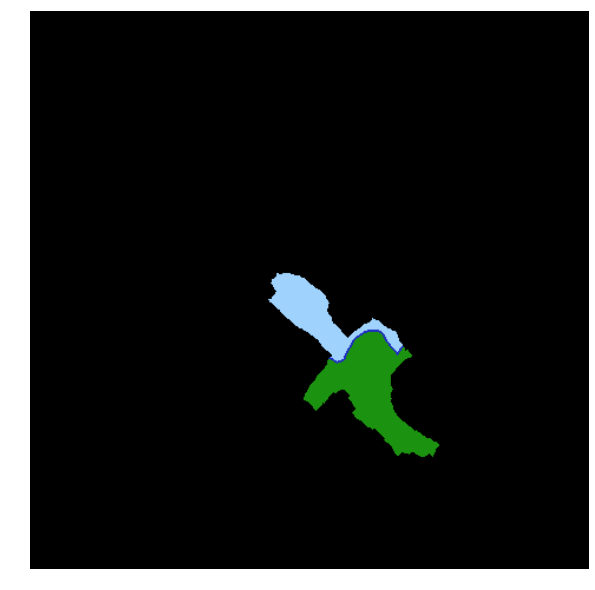

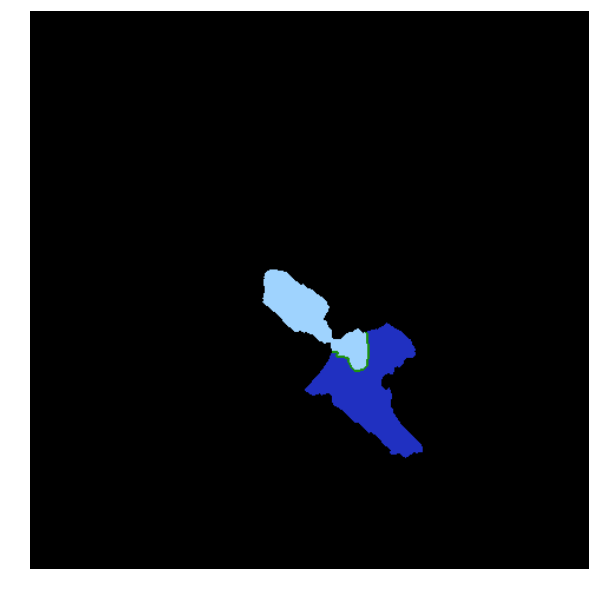

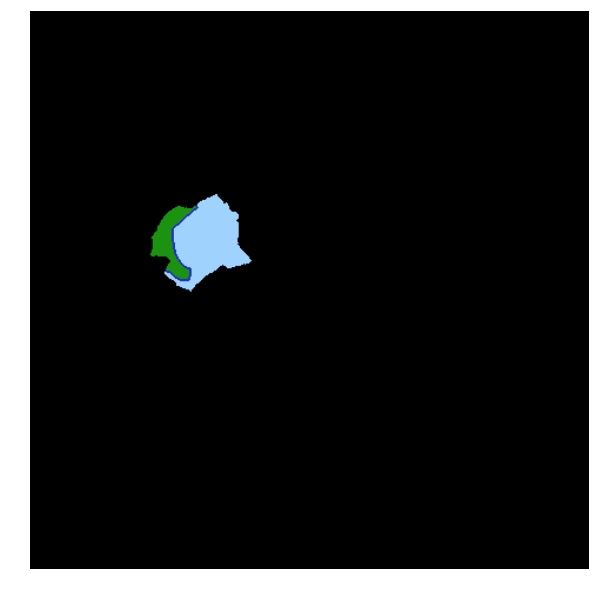

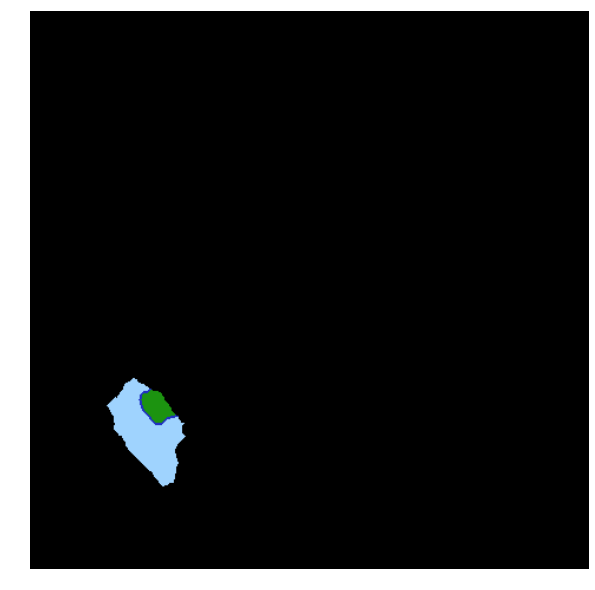

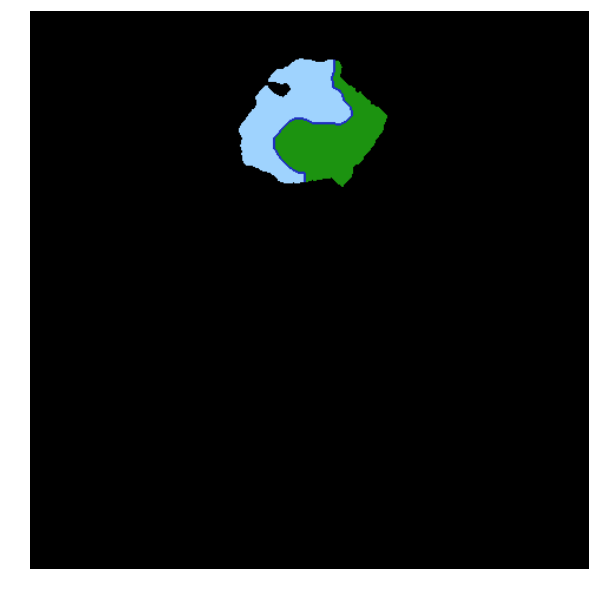

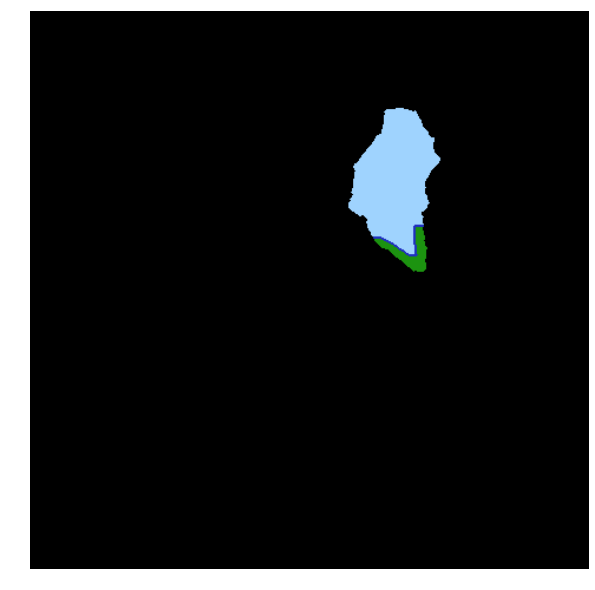

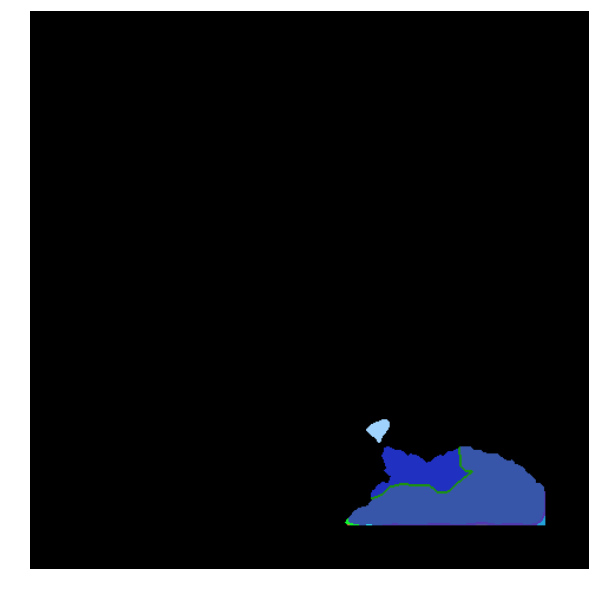

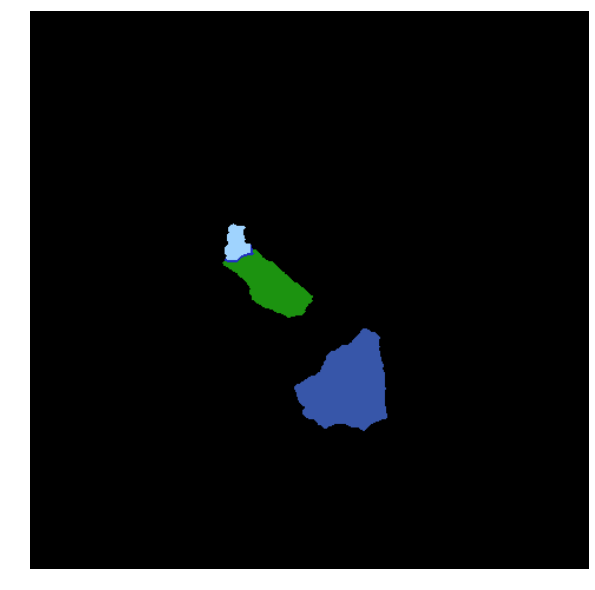

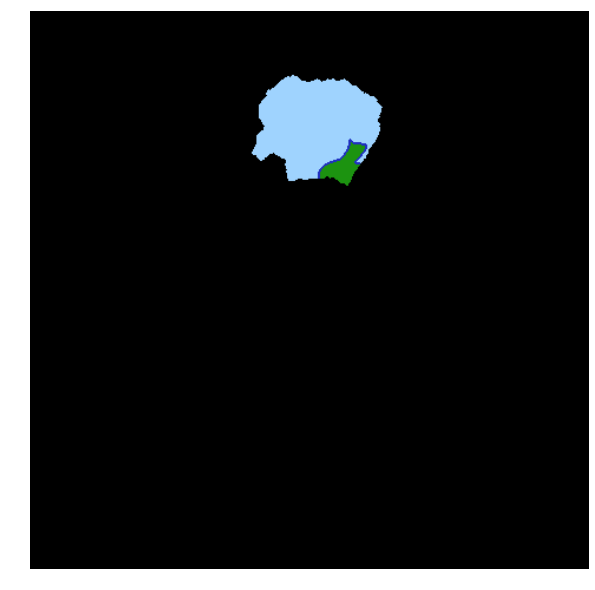

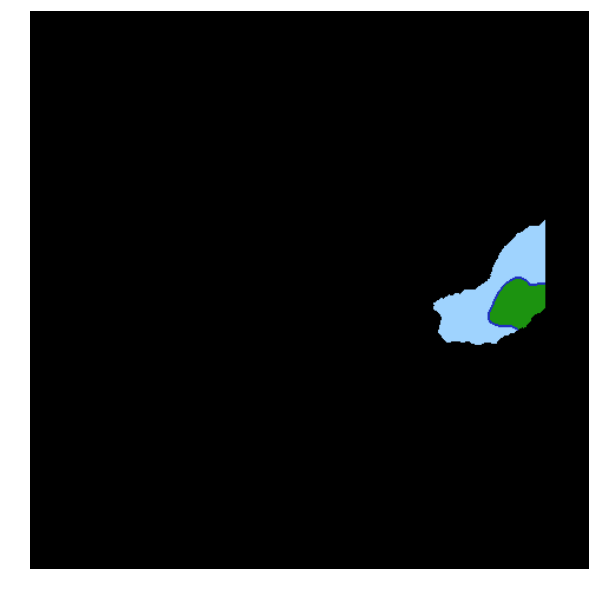

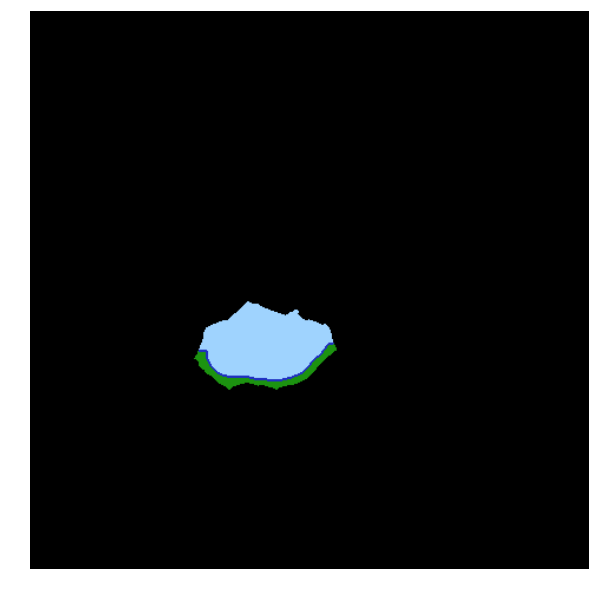

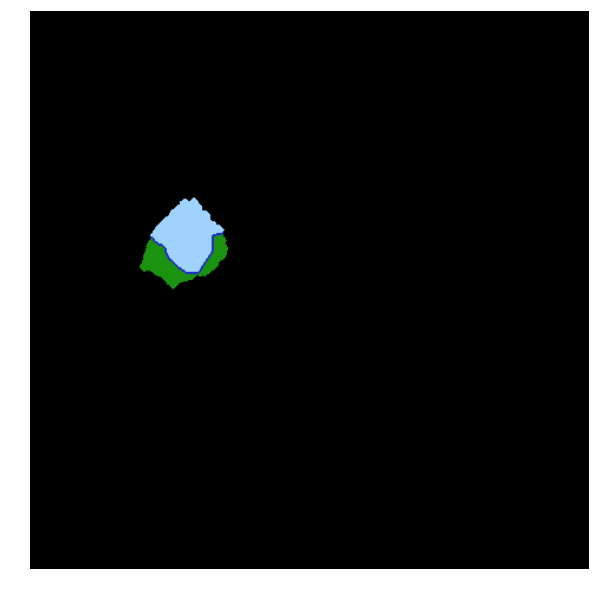

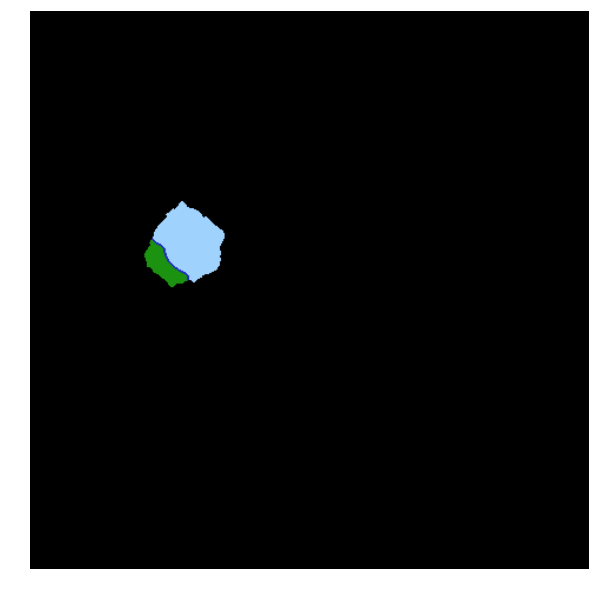

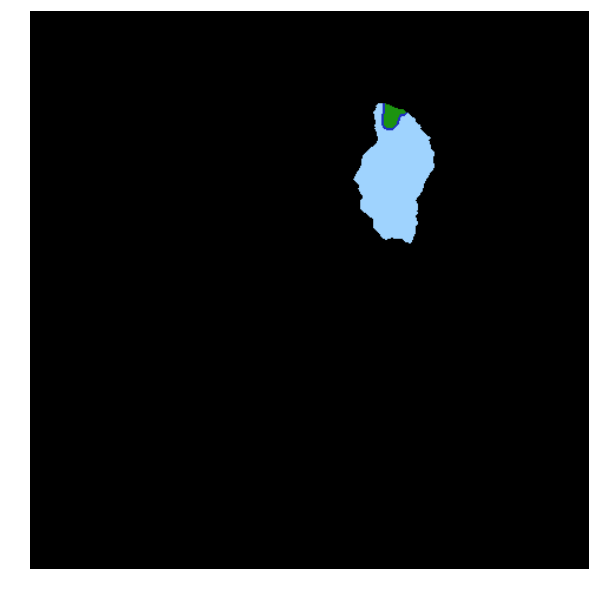

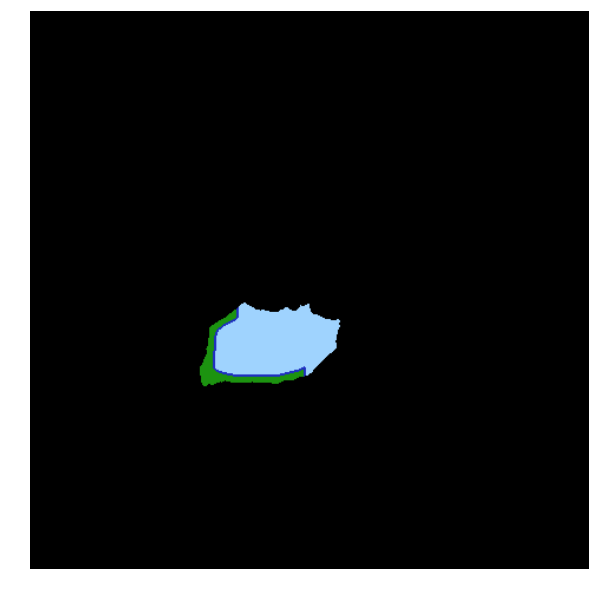

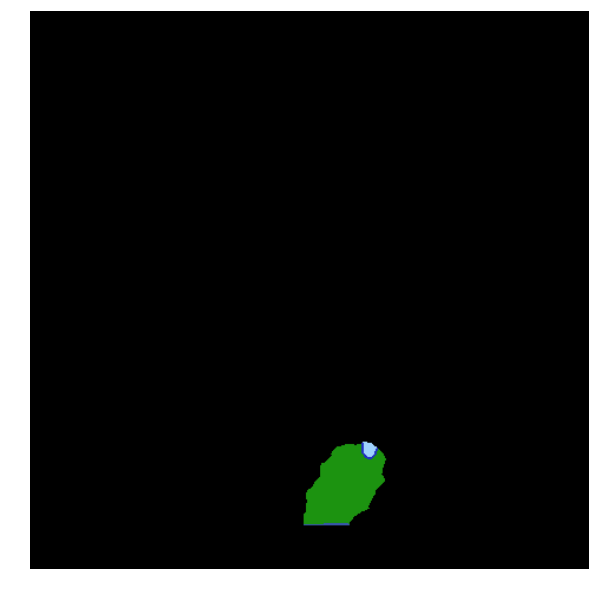

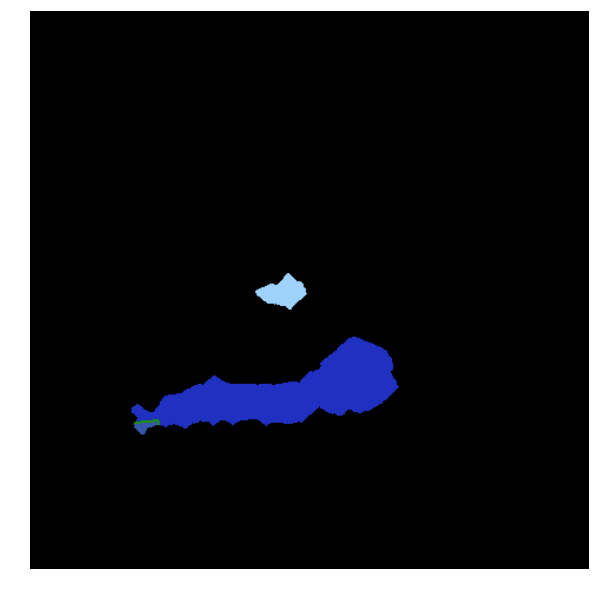

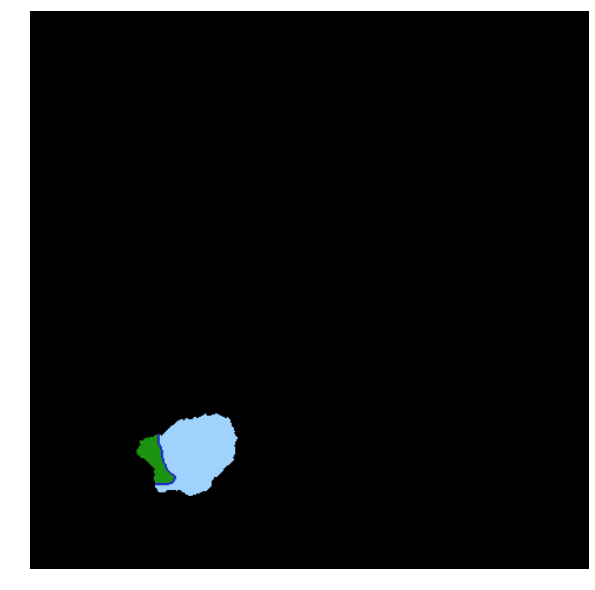

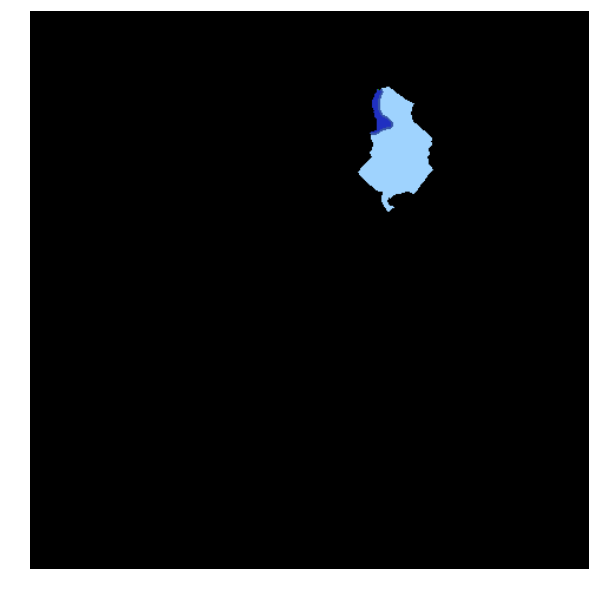

In [6]:
gp.Stats.run_dojo_xp(net)

In [8]:
gp.Stats.run_dojo_xp(net)

a
Finding Top 5 merge errors..
11  merge errors found.
Creating dojo bigM..

Correcting merge errors with p < .05


IndexError: index 2716 is out of bounds for axis 0 with size 2716

Original median VI 0.379410649496
Creating cylinder bigM..
4772 generated in 485.587388992 seconds.
Grouped into 1159 patches in 0.0223789215088 seconds.
4568 generated in 472.964470863 seconds.
Grouped into 1115 patches in 0.0217130184174 seconds.
4624 generated in 506.134793997 seconds.
Grouped into 1123 patches in 0.021656036377 seconds.
4276 generated in 473.910904169 seconds.
Grouped into 1054 patches in 0.0167679786682 seconds.
4220 generated in 318.505452156 seconds.
Grouped into 1040 patches in 0.0194969177246 seconds.
4348 generated in 314.940897942 seconds.
Grouped into 1061 patches in 0.0204341411591 seconds.
4372 generated in 280.479432106 seconds.
Grouped into 1065 patches in 0.0206258296967 seconds.
4528 generated in 287.444966793 seconds.
Grouped into 1106 patches in 0.0209999084473 seconds.
4392 generated in 277.018268824 seconds.
Grouped into 1070 patches in 0.0208740234375 seconds.
4232 generated in 313.791292906 seconds.
Grouped into 1031 patches in 0.0196208953857 s

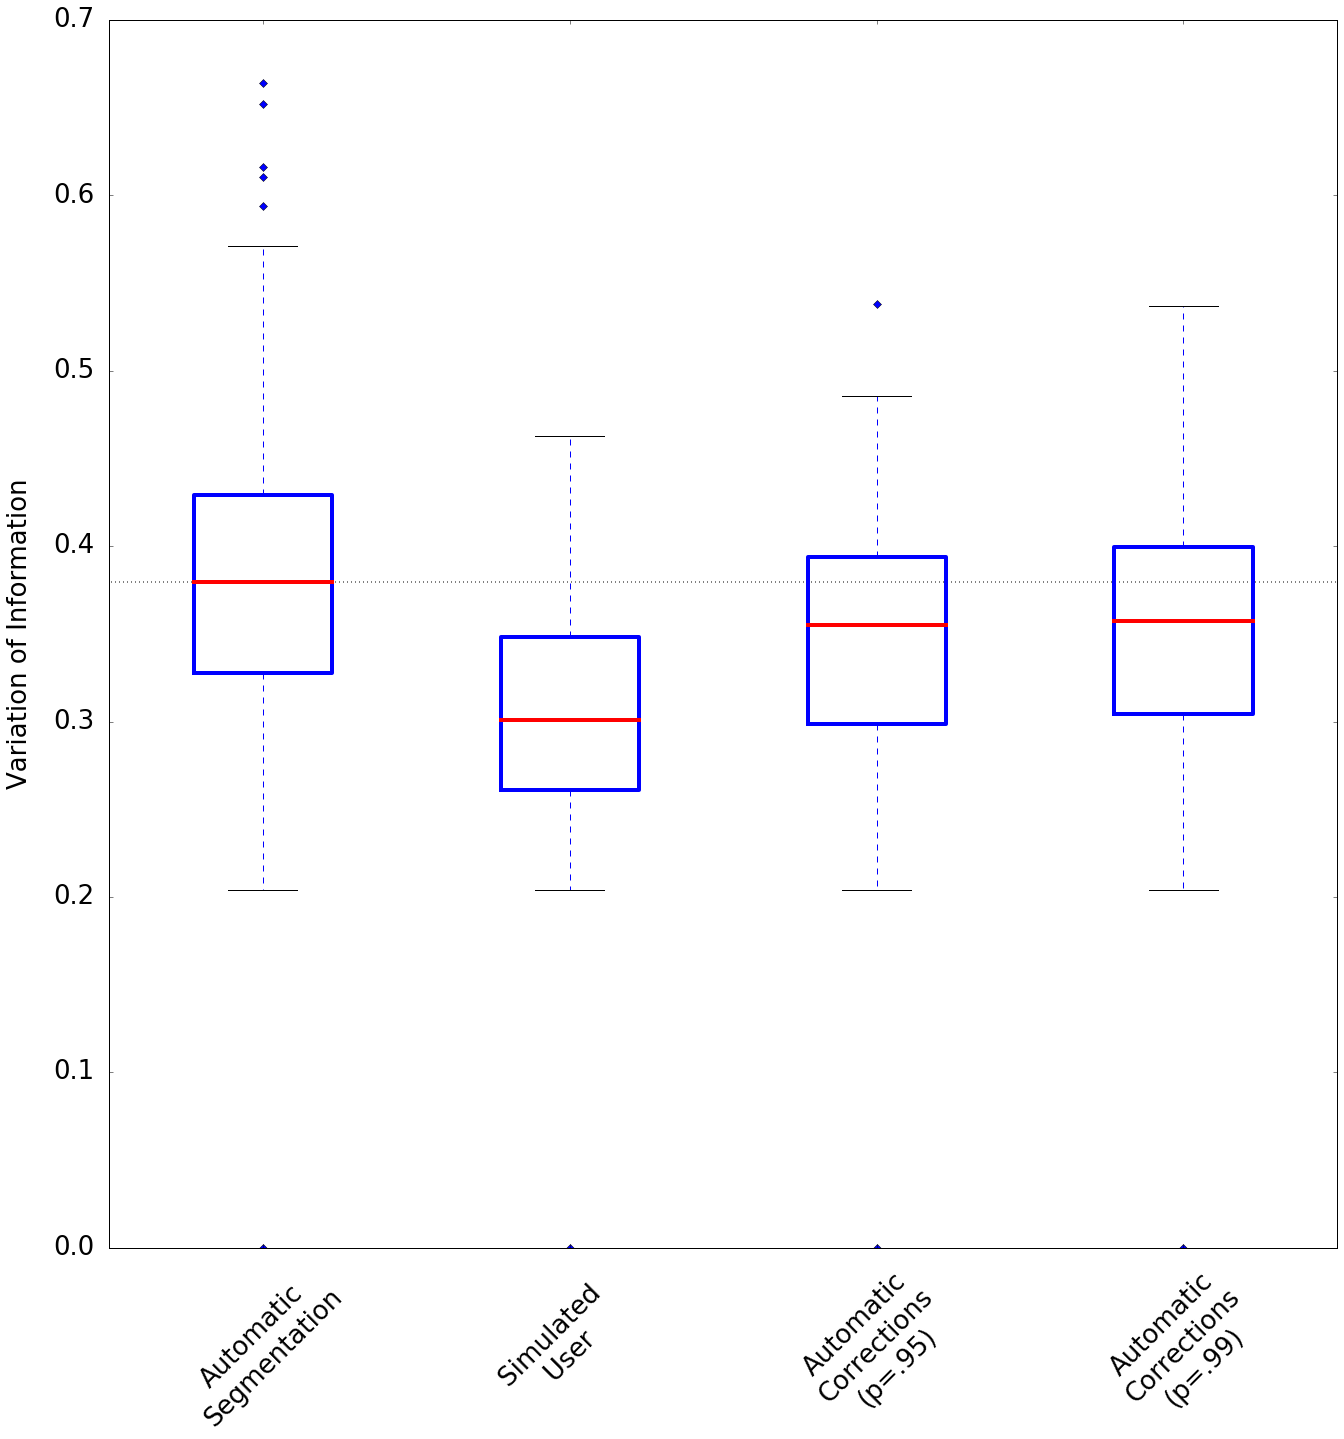

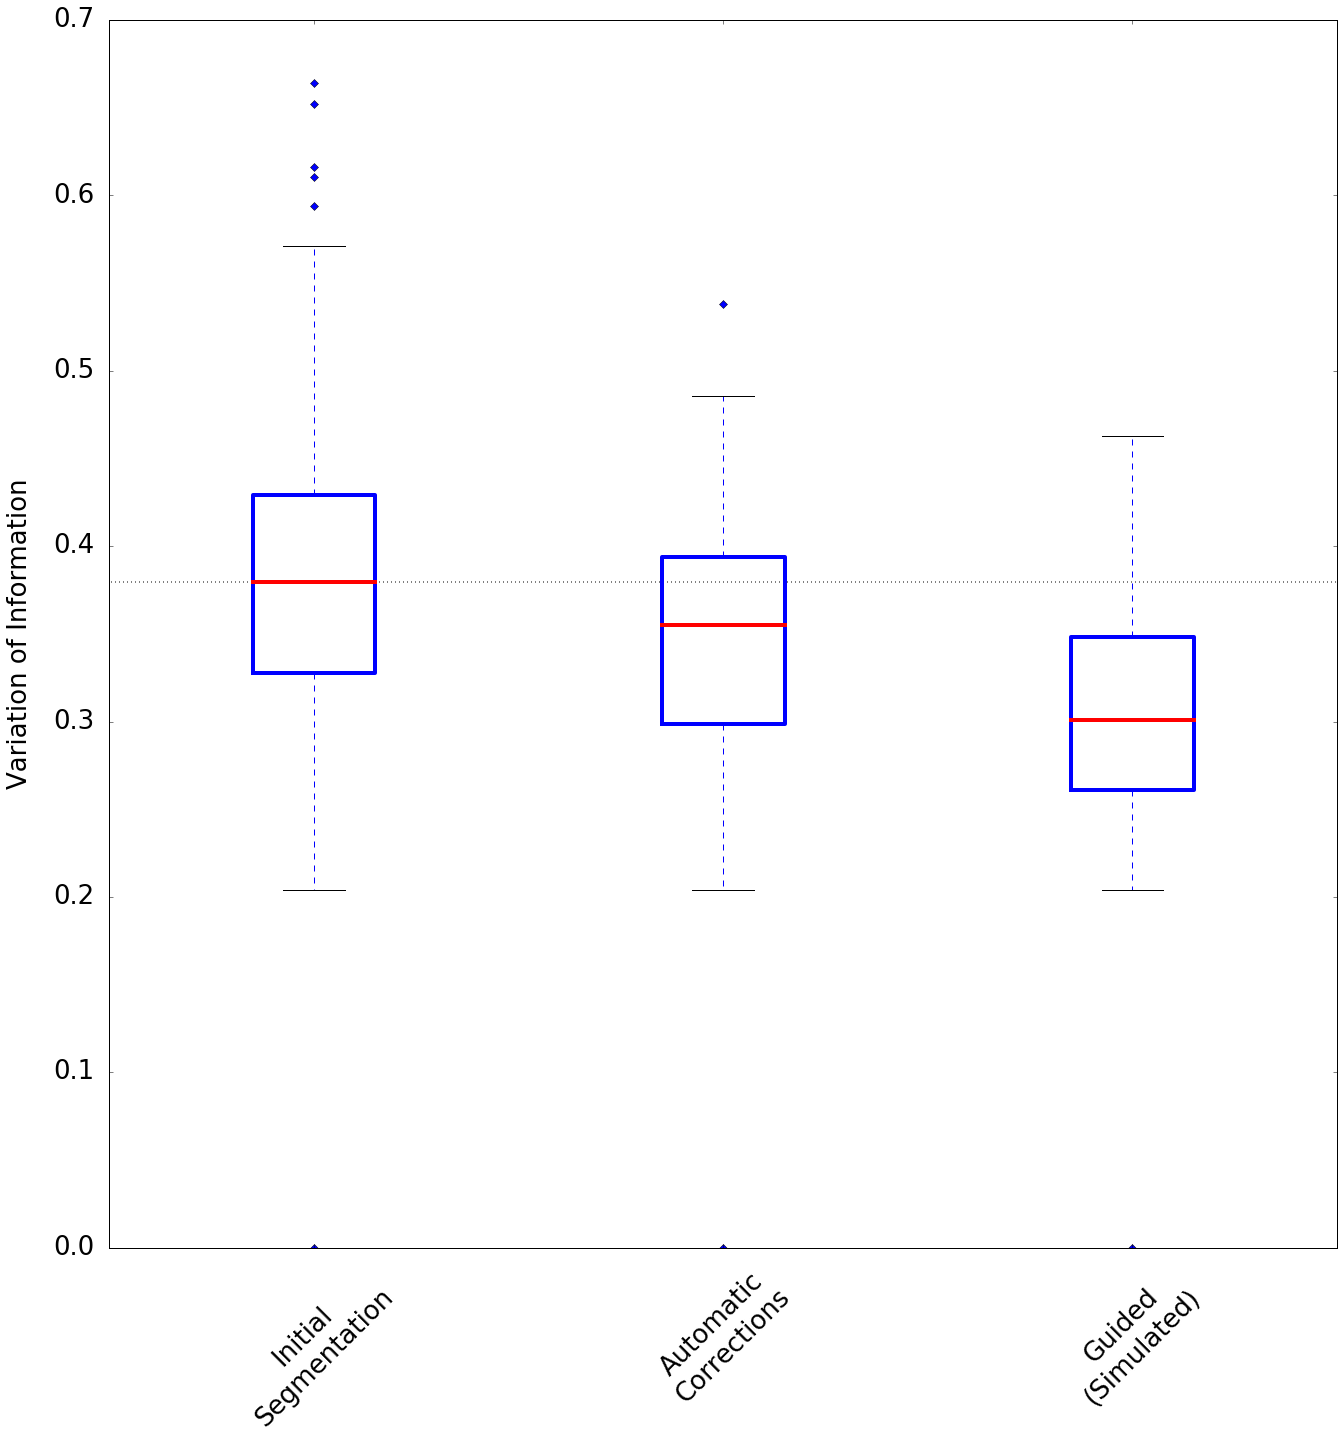

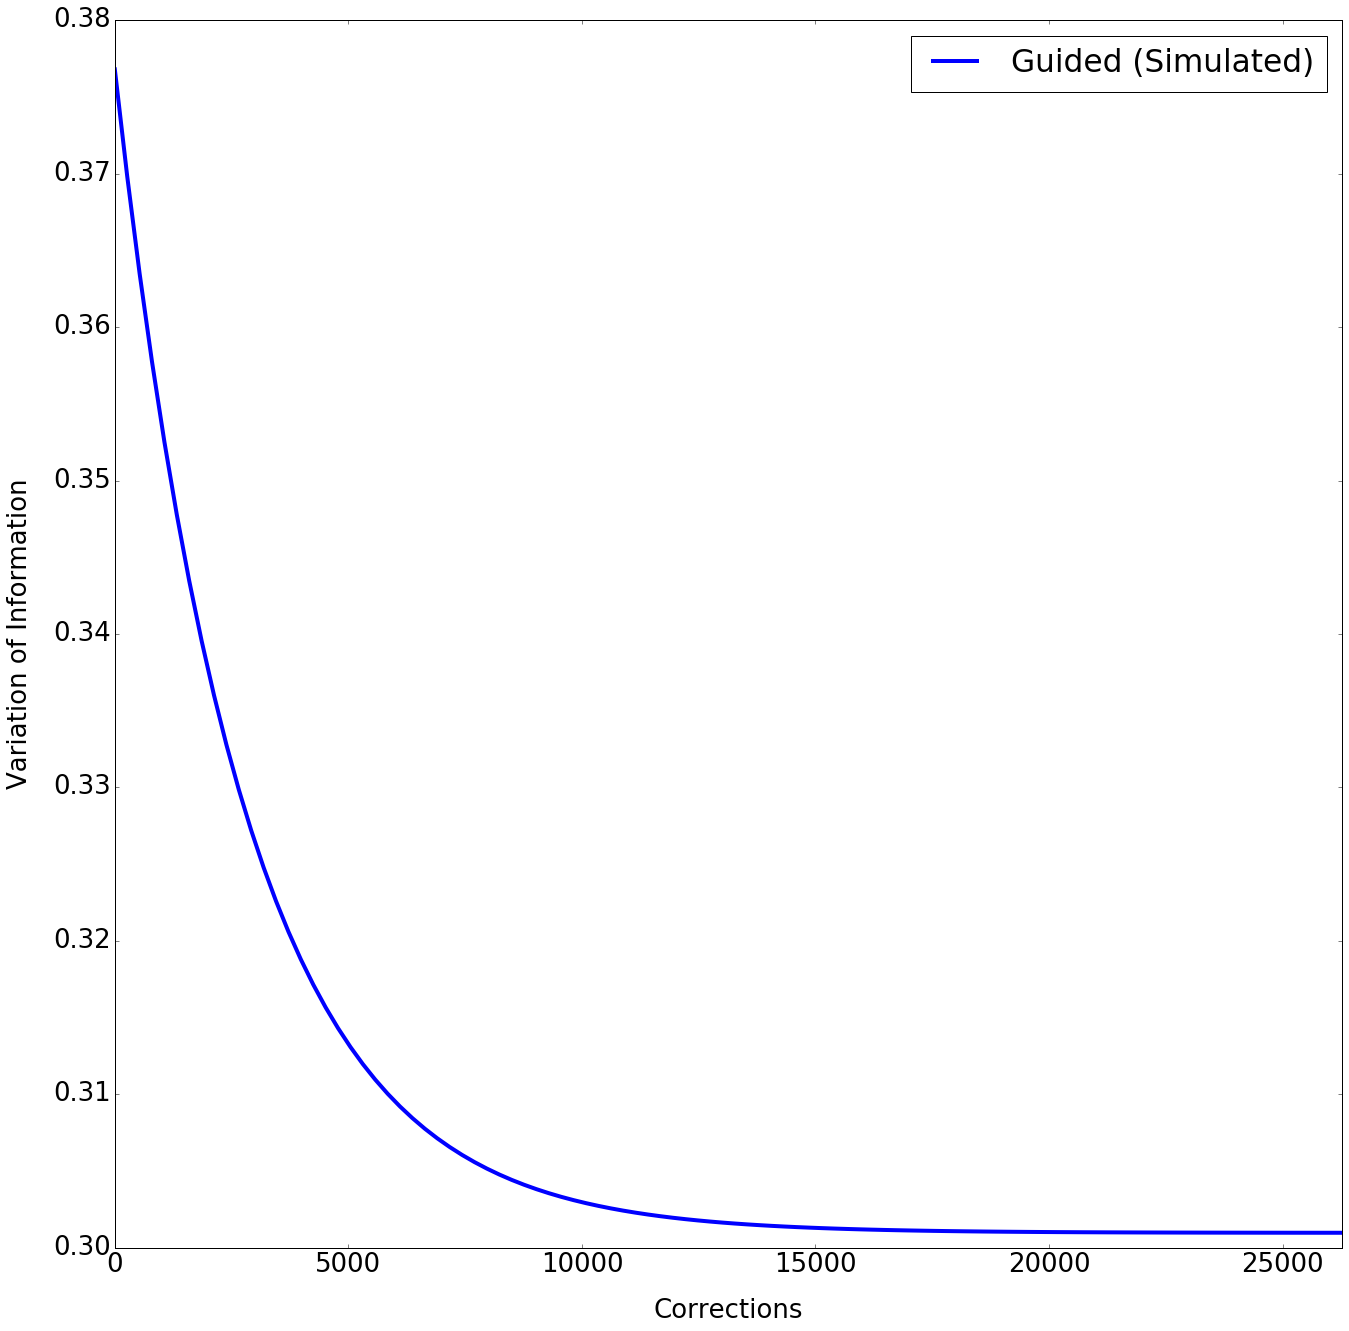

TypeError: plot_vi_combined_no_interpolation() got an unexpected keyword argument 'sweetspot'

In [13]:
gp.Stats.run_cylinder_xp(net)

In [36]:
# load dojo data
input_image, input_prob, input_gold, input_rhoana, dojo_bbox = gp.Legacy.read_dojo_data()



In [40]:
input_image[0].max()

225

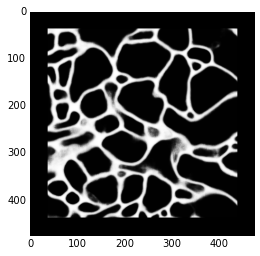

In [38]:
imshow(input_prob[2], cmap='gray')

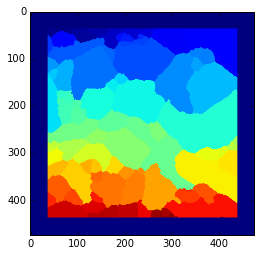

In [41]:
imshow(input_rhoana[0])

In [53]:
import numpy as np
def seg_to_color(slice):
	colors = np.zeros(slice.shape+(3,),dtype=np.uint8)
	colors[:,:,0] = np.mod(107*slice[:,:],700).astype(np.uint8)
	colors[:,:,1] = np.mod(509*slice[:,:],900).astype(np.uint8)
	colors[:,:,2] = np.mod(200*slice[:,:],777).astype(np.uint8)
	return colors

i_r = input_image[0]
rrr = np.zeros((i_r.shape[0], i_r.shape[1], 3), dtype=np.uint8)
for j in range(rrr.shape[0]):
    for i in range(rrr.shape[1]):
        rrr[j,i] = (i_r[j,i], i_r[j,i], i_r[j,i])
    
rrr[input_prob[0] > 220 ] = (0,255,0)

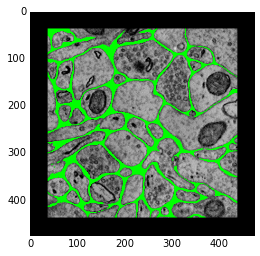

In [57]:
plt.figure()
imshow(rrr)

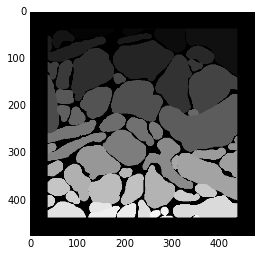

In [55]:
imshow(input_gold[0], cmap='gray')

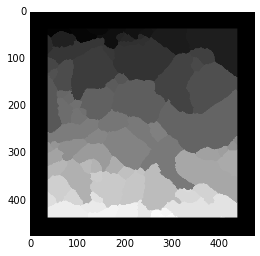

In [56]:
imshow(input_rhoana[0], cmap='gray')

In [62]:
original_mean_VI, original_median_VI, original_VI_s = gp.Legacy.VI(input_gold, input_rhoana)
original_adapted_rand = gp.metrics.adapted_rand(input_rhoana, input_gold)

KeyboardInterrupt: 

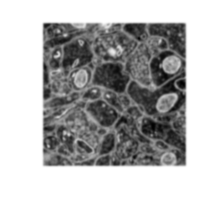

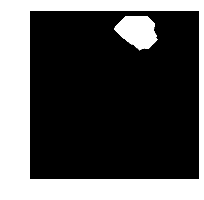

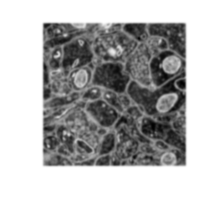

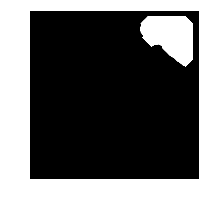

In [64]:
merge_errors = gp.Legacy.get_top5_merge_errors(net, input_image, input_prob, input_rhoana)


In [66]:
first_rand = gp.metrics.adapted_rand(input_rhoana[0], input_gold[0])

In [78]:
net.uuid = 'IPMLB'

In [80]:
M = gp.Legacy.create_bigM_without_mask(net, input_image[0:1], input_prob[0:1], input_rhoana[0:1], verbose=False)

In [85]:
newM, new_rhoana, fixes, new_vi_s = gp.Legacy.splits_global_from_M_automatic(net, M, input_image[0:1], input_prob[0:1], 
                                                                             input_rhoana[0:1], input_gold[0:1], sureness_threshold=.95)

In [87]:
fixes

[(1, 0.99998939037322998),
 (1, 0.99904423952102661),
 (0, 0.99768221378326416),
 (1, 0.99105918407440186),
 (1, 0.98917317390441895),
 (1, 0.97869938611984253),
 (0, 0.97463154792785645),
 (1, 0.96067178249359131),
 (1, 0.96036547422409058)]

In [88]:
gp.metrics.adapted_rand(new_rhoana[0], input_gold[0])

0.067449536773076524

In [89]:
first_rand

0.073737703314086689